In [2]:
import numpy as np
import pandas as pd

In [71]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [72]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [75]:
# warnings 없애준다
import warnings
warnings.filterwarnings(action='ignore') 

데이터 불러오기

In [3]:
data = pd.read_csv('../../data/02. crime_in_Seoul.csv', thousands=',' ,encoding = 'euc-kr')

In [39]:
data.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


구 별로 분류하기

In [40]:
import googlemaps

In [41]:
gmap_key = ''
gmaps = googlemaps.Client(key=gmap_key)

In [42]:
gmaps.geocode('서울중부경찰서', language = 'ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [43]:
station_name = []
for name in data['관서명']:
    station_name.append('서울'+str(name[:-1])+'경찰서')
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [44]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get('formatted_address'))
    
    tmp_loc = tmp[0].get('geometry')
    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    print(name+'-->'+tmp[0].get('formatted_address'))

서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동5가 301
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 마포대로 183
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 응암동 응암로 208
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50
서울중랑경찰서-->대한민국 서울특별시 중랑구 망우동 489-7
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 998
서울관악경찰서-->대한민국 서울특별시 관악구 봉천동
서울강서경찰서-->대한민국 서울특별시 강서구 화곡6동 980-15
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 구로동 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 가락본동 9
서울노원경찰서-->대한민국 서울특별시 

In [45]:
station_address

['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 회현동 한강대로 410',
 '대한민국 서울특별시 서대문구 충현동 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 마포대로 183',
 '대한민국 서울특별시 영등포구 영등포동1가 618-7',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진1동 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 응암동 응암로 208',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50',
 '대한민국 서울특별시 중랑구 망우동 489-7',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 강서구 화곡6동 980-15',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 구로동 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배본동 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

In [46]:
gu_name = []

for name in station_address:
    gu_name.append(name.split()[2])
    
data['구별'] = gu_name
data.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [47]:
data.loc[data['관서명'] == '금천서', '구별'] = '관악구'

In [48]:
data[data['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,관악구


pivot_table을 이용해서 데이터 정리하기

In [49]:
data.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [52]:
criminal_anal = data.pivot_table(index = '구별', aggfunc = np.sum)
criminal_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,343,471,20,18,12,12,1715,4273,4418,5352


In [55]:
criminal_anal['강간검거율'] = criminal_anal['강간 검거']/criminal_anal['강간 발생'] *100
criminal_anal['강도검거율'] = criminal_anal['강도 검거']/criminal_anal['강도 발생'] *100
criminal_anal['살인검거율'] = criminal_anal['살인 검거']/criminal_anal['살인 발생'] *100
criminal_anal['절도검거율'] = criminal_anal['절도 검거']/criminal_anal['절도 발생'] *100 
criminal_anal['폭력검거율'] = criminal_anal['폭력 검거']/criminal_anal['폭력 발생'] *100

del criminal_anal['강간 검거']
del criminal_anal['강도 검거']
del criminal_anal['살인 검거']
del criminal_anal['절도 검거']
del criminal_anal['폭력 검거']

criminal_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,471,18,12,4273,5352,72.823779,111.111111,100.000000,40.135736,82.548580


In [57]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    criminal_anal.loc[criminal_anal[column] > 100, column] = 100

criminal_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,471,18,12,4273,5352,72.823779,100.000000,100.000000,40.135736,82.548580


In [59]:
criminal_anal.rename(columns = {
    '강간 발생':'강간',
    '강도 발생':'강도',
    '살인 발생':'살인',
    '절도 발생':'절도',
    '폭력 발생':'폭력'
},  inplace = True)

criminal_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,471,18,12,4273,5352,72.823779,100.000000,100.000000,40.135736,82.548580


정규화

In [61]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = criminal_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = criminal_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm[col2] = criminal_anal[col2]

crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580


cctv 데이터 가져오기

In [63]:
result_CCTV = pd.read_csv('./data/01. CCTV_result.csv', encoding = 'utf-8', index_col = '구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [64]:
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496


In [66]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.390121
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.094698
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.500513
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.087685
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496,4.598039


In [67]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.390121,369.707384
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.094698,370.084431
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.500513,406.943540
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.087685,417.767372
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496,4.598039,395.508095


seaborn으로 시각화하기

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

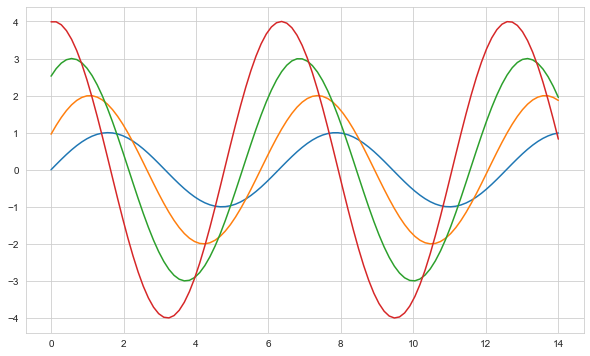

In [70]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

sns.set_style('whitegrid')

plt.figure(figsize = (10,  6))
plt.plot(x, y1, x, y2, x, y3, x, y4 )
plt.show()

In [73]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,0.940379,0.941176,0.916667,0.868224,0.723674,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.390121,369.707384
강동구,0.146341,0.058824,0.166667,0.405919,0.316947,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.094698,370.084431
강북구,0.138211,0.529412,0.416667,0.115576,0.300647,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.500513,406.943540
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.087685,417.767372
관악구,1.000000,0.764706,0.833333,1.000000,1.000000,72.823779,100.000000,100.000000,40.135736,82.548580,525515.0,1496,4.598039,395.508095


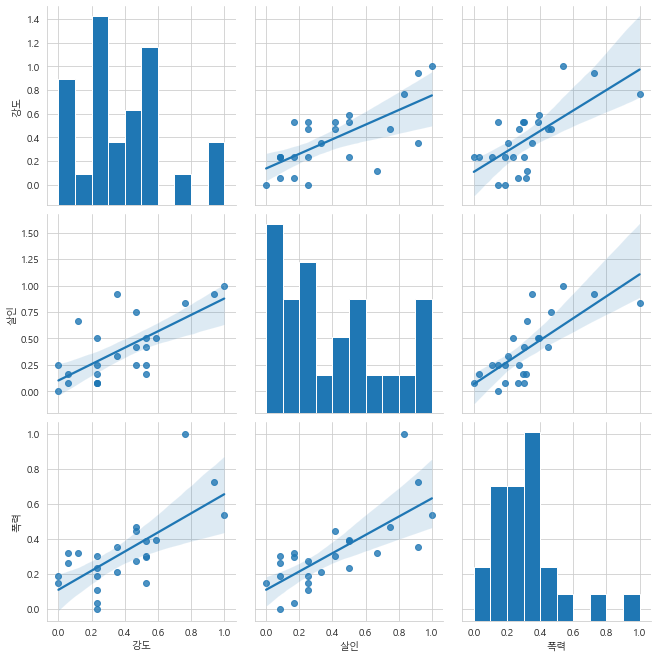

In [76]:
sns.pairplot(crime_anal_norm, vars = ['강도', '살인', '폭력'], kind = 'reg', size = 3)
plt.show()

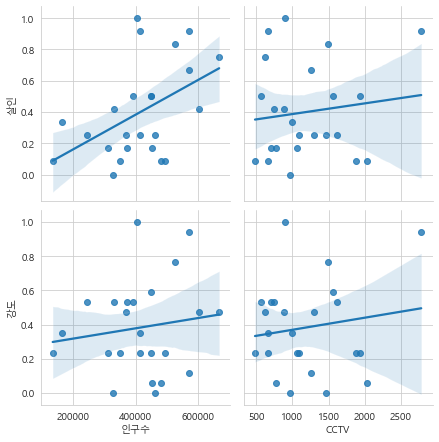

In [78]:
sns.pairplot(crime_anal_norm, x_vars = ['인구수', 'CCTV'],
            y_vars = ['살인', '강도'], kind = 'reg', size = 3)
plt.show()

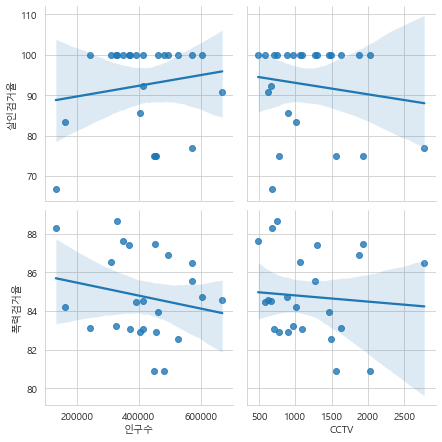

In [79]:
sns.pairplot(crime_anal_norm, x_vars = ['인구수', 'CCTV'],
            y_vars = ['살인검거율', '폭력검거율'], kind = 'reg', size = 3)
plt.show()

In [80]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거']/tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending = False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
강서구,0.433604,0.470588,0.416667,0.321807,0.445019,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.087685,96.572809
광진구,0.373984,0.529412,0.166667,0.611526,0.294437,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,1.976026,96.375820
동대문구,0.192412,0.470588,0.250000,0.285981,0.274515,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.473496,95.444250
용산구,0.249322,0.529412,0.250000,0.153894,0.145666,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.328295,94.776790


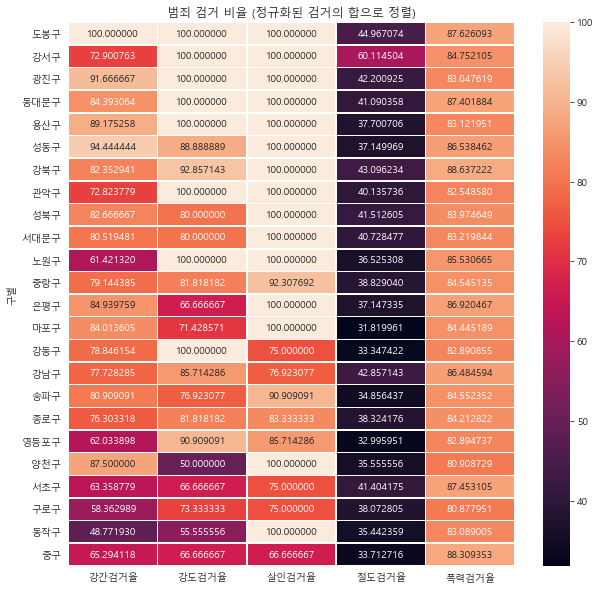

In [81]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm_sort = crime_anal_norm.sort_values(by = '검거', ascending = False)

plt.figure(figsize = (10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], annot = True , fmt = 'f', linewidths = .5)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

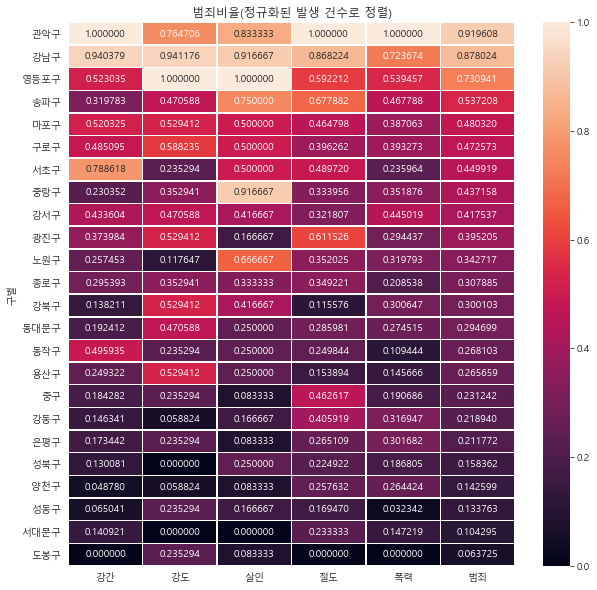

In [83]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5

crime_anal_norm_sort = crime_anal_norm.sort_values(by = '범죄', ascending = False)
plt.figure(figsize = (10, 10))

sns.heatmap(crime_anal_norm_sort[target_col], annot = True, fmt = 'f', linewidths = .5)
plt.title('범죄비율(정규화된 발생 건수로 정렬)')
plt.show()

folium

In [84]:
import folium

In [87]:
map_osm = folium.Map(location = [45.5236, -122.6750],
                     zoom_start = 13,
                     tiles = 'Stamen Toner')
map_osm

In [89]:
map_2 = folium.Map(location = [45.5236, -122.6750],
                   zoom_start = 13)
folium.Marker([45.5244, -122.6699], 
              popup = 'Ther Waterfront').add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], 
                   radius = 50,
                   popup = 'Laurelhurst Park', color = '#3186cc', 
                   fill_color = '#3186cc').add_to(map_2)
map_2

서울시 범죄율에 대한 지도 시각화

In [90]:
import json
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [91]:
map = folium.Map(location = [37.5502, 126.982], 
                 zoom_start = 11)
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd',
               key_on = 'feature.id')

map

In [92]:
map = folium.Map(location = [37.5502, 126.982], 
                 zoom_start = 11)
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['강간'],
               columns = [crime_anal_norm.index, crime_anal_norm['강간']],
               fill_color = 'PuRd',
               key_on = 'feature.id')

map

In [93]:
map = folium.Map(location = [37.5502, 126.982], 
                 zoom_start = 11)
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd',
               key_on = 'feature.id')

map

인구 수 대비 범죄율

In [95]:
tmp_criminal = crime_anal_norm['살인']/crime_anal_norm['인구수']*1000000

map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

map.choropleth(geo_data = geo_str,
                data = tmp_criminal, 
                columns = [crime_anal_norm.index, tmp_criminal],
                fill_color = 'PuRd',
                key_on = 'feature.id')
map

In [98]:
crime_anal_raw = pd.read_csv('./data/02. crime_in_Seoul_include_gu_name.csv',
                             encoding = 'utf-8')

crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [99]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()

crime_anal_raw['검거'] = np.sum(tmp, axis = 1)

crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [102]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

for name, n in zip(crime_anal_raw['관서명'], crime_anal_raw.index):
    folium.Marker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],
                  popup = name).add_to(map)
    
map

In [106]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd',
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n] ,crime_anal_raw['lng'][n] ],
                        popup = crime_anal_raw['관서명'][n],
                        radius = crime_anal_raw['검거'][n]*10,
                        color = '#3186cc', 
                        fill_color = '#3186cc').add_to(map)
    
    
map